<a href="https://colab.research.google.com/github/vignesh-pala/NLP/blob/master/NLP_Doc_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer 
import string
import pandas as pd
#from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis, mahalanobis
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance
import tensorflow_hub as hub

nltk.download('stopwords')
nltk.download('wordnet')

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") 

pd.set_option('max_colwidth', 80)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Class: Semantic Match

In [4]:
class semantic_match:
  def __init__(self):
    self.stop_words = nltk.corpus.stopwords.words('english') 
    self.lemmatizer = WordNetLemmatizer() 
    self.vectorizer = CountVectorizer()

  # Define method to normalize text by lower casing, removing punctuations, stopwords. Numbers are retained, and some essential punctuations  are 
  # retained
  def normalize_document(self, doc):
      # lower case and remove special characters\whitespaces
      doc = doc.lower() 
      doc = doc.strip()
      # tokenize document
      # split into words by white space
      words = doc.split()
      table = str.maketrans('', '', '!"#$%&()*+,./:;<=>?@[\\]^_{|}~') #retaining punc like ' which are part of italian and french languages
      stripped = [w.translate(table) for w in words]
      # filter stopwords out of document
      filtered_tokens = [token for token in stripped if token not in self.stop_words]
      #lemmatize the words to bring to the base form
      lemma_tokens = [self.lemmatizer.lemmatize(lemma) for lemma in filtered_tokens]
      # re-create document
      doc = ' '.join(lemma_tokens)
      return doc

  def norm_data(self, data):
    norm_doc = []
    for i in range(len(data)):
        norm_data = self.normalize_document(data[i])
        norm_doc.append(norm_data)
    return norm_doc

  def jaccard_similarity(self, query, document):
      intersection = set(query).intersection(set(document))
      union = set(query).union(set(document))
      return len(intersection)/len(union)

  def jaccard(self, data):
    out = []
    for req1 in data_norm:
      for req2 in data:
        out.append(self.jaccard_similarity(req1,req2))
    return out

  def USE_similarity(self, data):
    message_embeddings = embed(data)
    return(np.inner(message_embeddings, message_embeddings))
    
  def plot_similarity(self,labels, out, rotation, title):
    x = np.array((out))
    x_res=x.reshape(10,10)
    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(figsize=(15,10 ))
    g = sns.heatmap(
        x_res,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap="YlOrRd",
        ax=ax)
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity : "+title )

# Read Input

In [5]:
df = pd.read_csv('/content/Input_RFP - Requirements.csv',encoding='ISO-8859-1')
df.head()

,SNO,ReqID,Requirement
0,1,FR1.07,The System will apply business rules to facilitate the seamless and coordina...
1,2,FR1.08,The System will establish unique date-specific plans for each program applic...
2,3,FR1.09,The System will provide the flexibility to enroll Members beginning on any d...
3,4,FR1.10,The System will maintain a record of benefit assignment(s) for Members and w...
4,5,FR1.100,The Solution shall provide details on the Web portal on how to file a grievance


In [6]:
data = df['Requirement']

In [7]:
sm = semantic_match()
data_norm = sm.norm_data(data)
data_norm[0]

'system apply business rule facilitate seamless coordinated assignment one plan aimed meeting member\x92s health functional cultural linguistic need'

In [8]:
###tesst
def cosine_distance_countvectorizer_method(s1, s2):
    # sentences to list
    allsentences = [s1 , s2]
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

# Jaccard Similarily Method

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


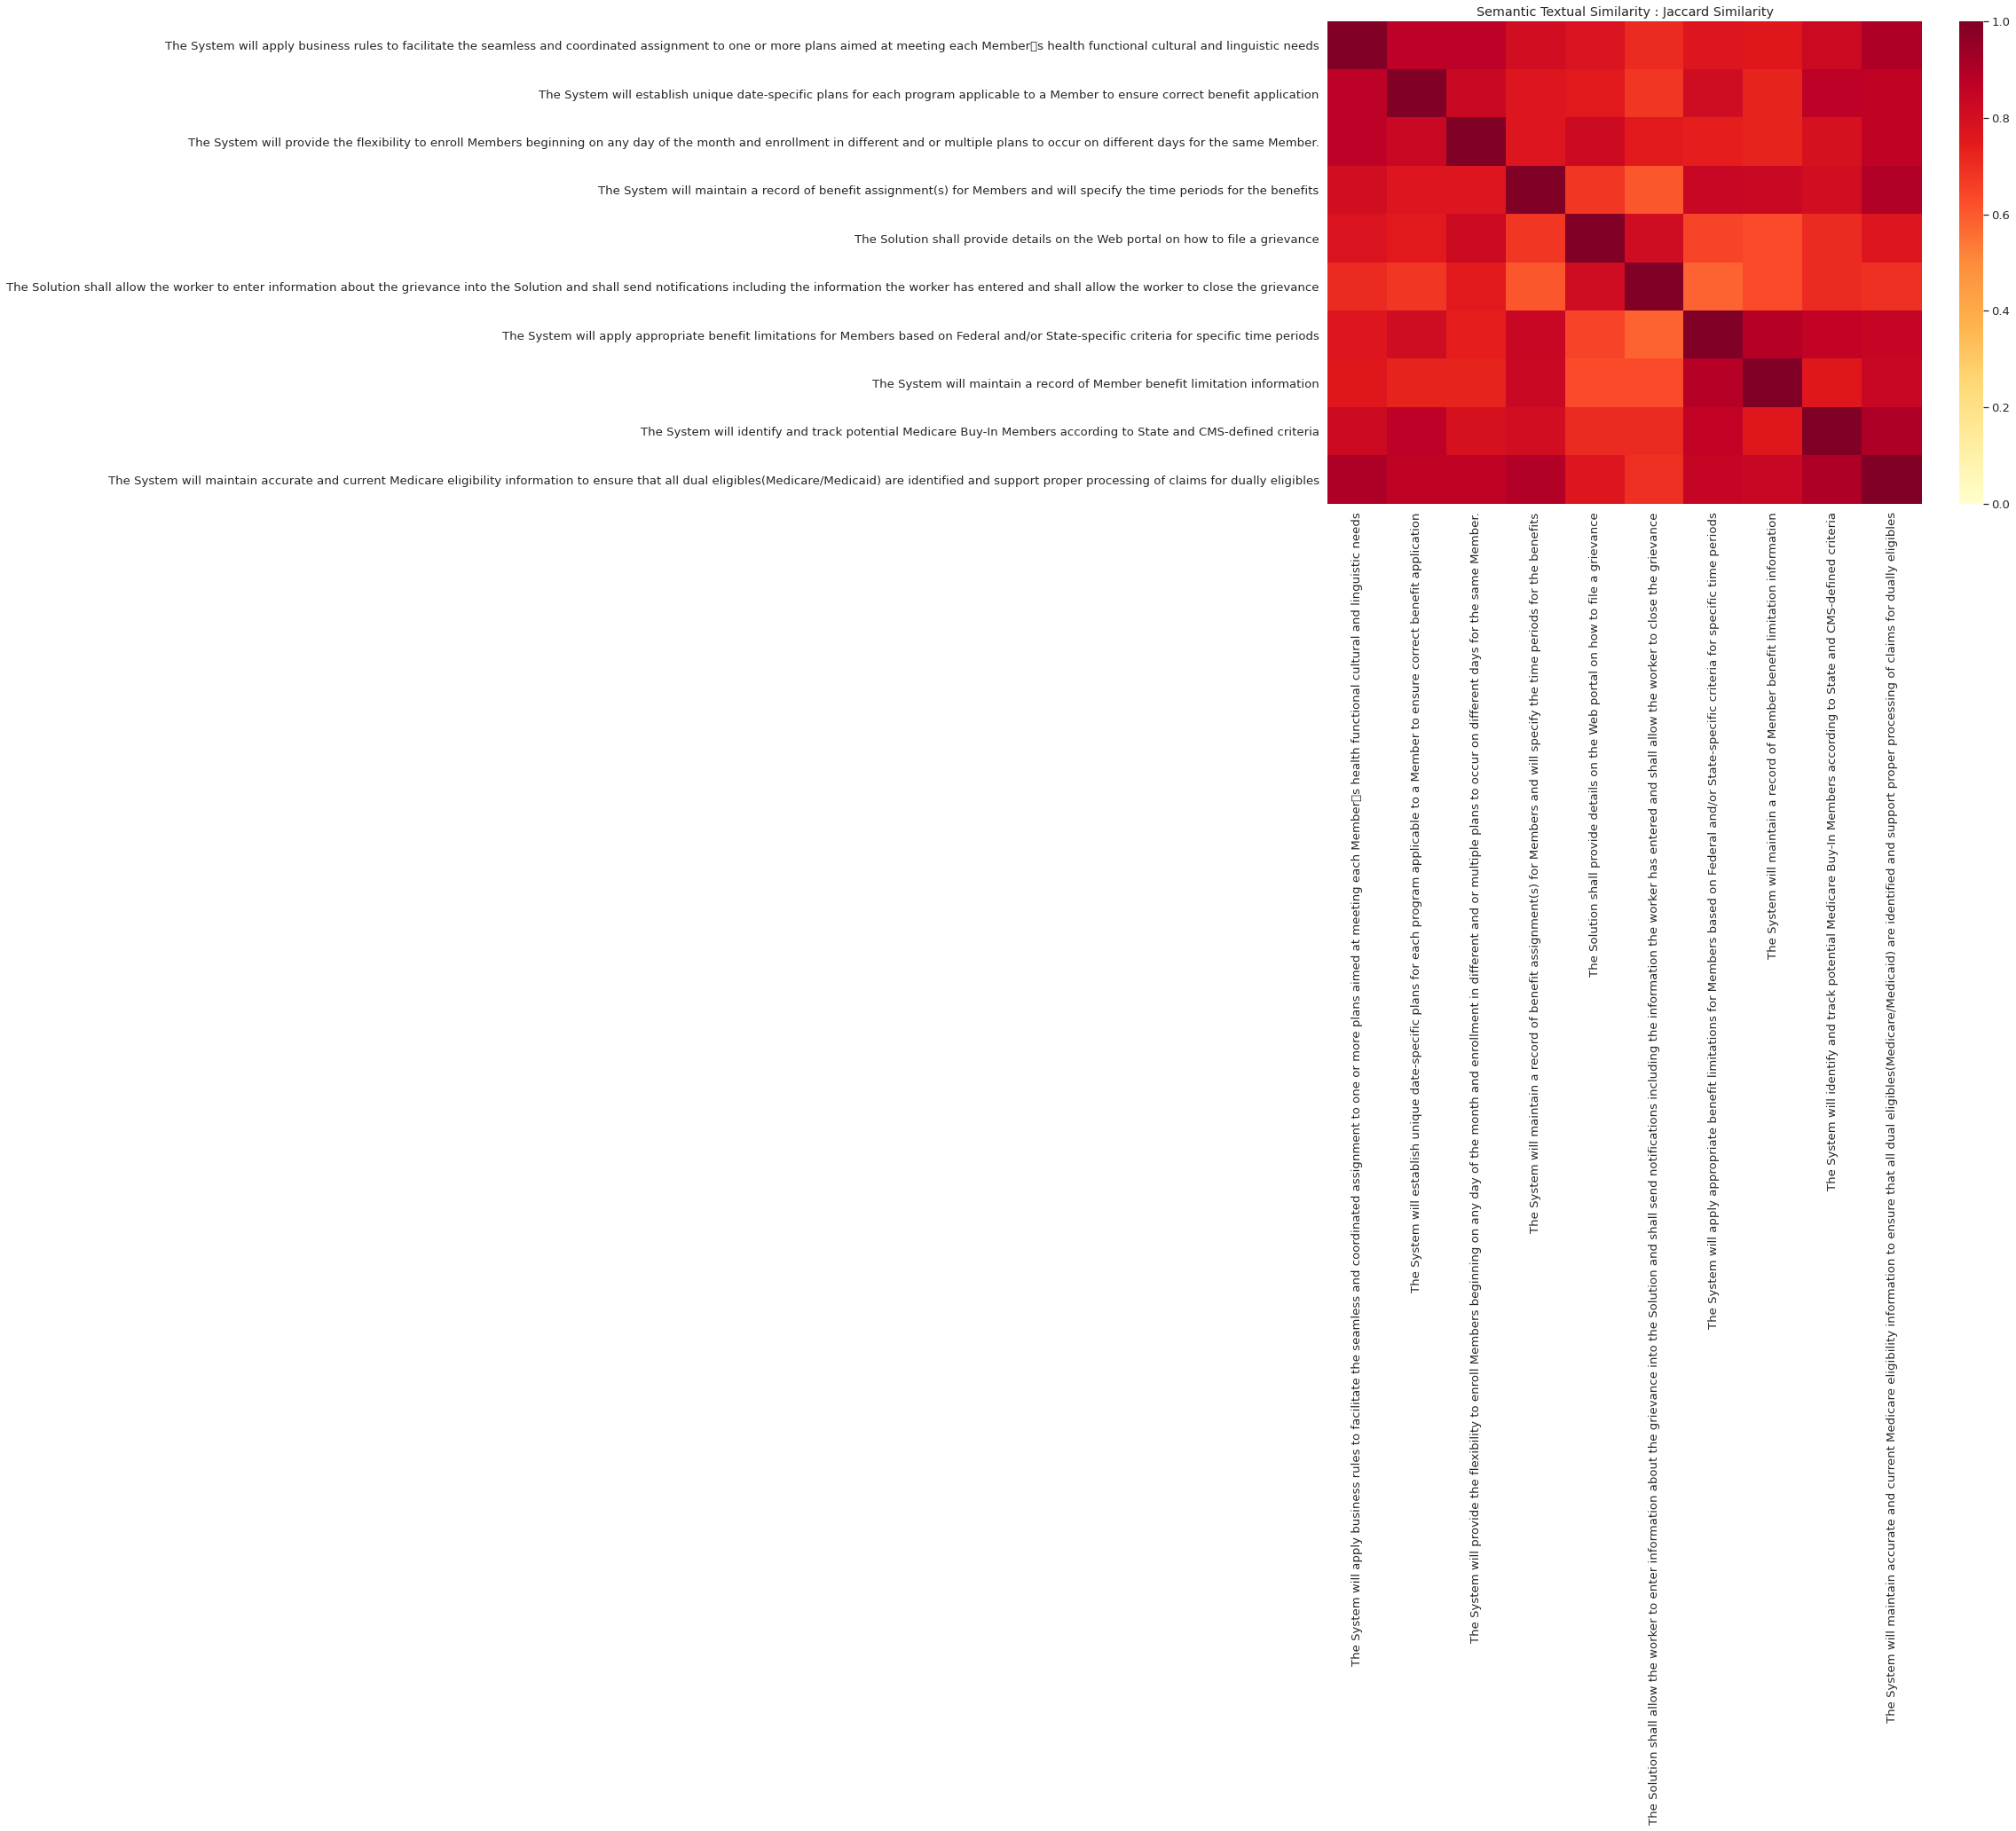

In [9]:
js = sm.jaccard(data_norm)
sm.plot_similarity(data,js,90, "Jaccard Similarity")

# Universal Sentence Encoder

*   Embeds the sentence thru pre-trained model
*   embeddings produced by the Universal Sentence Encoder are approximately normalized
*   The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

Note: The model takes care of data cleaning, so we can even pass the raw text to the model


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


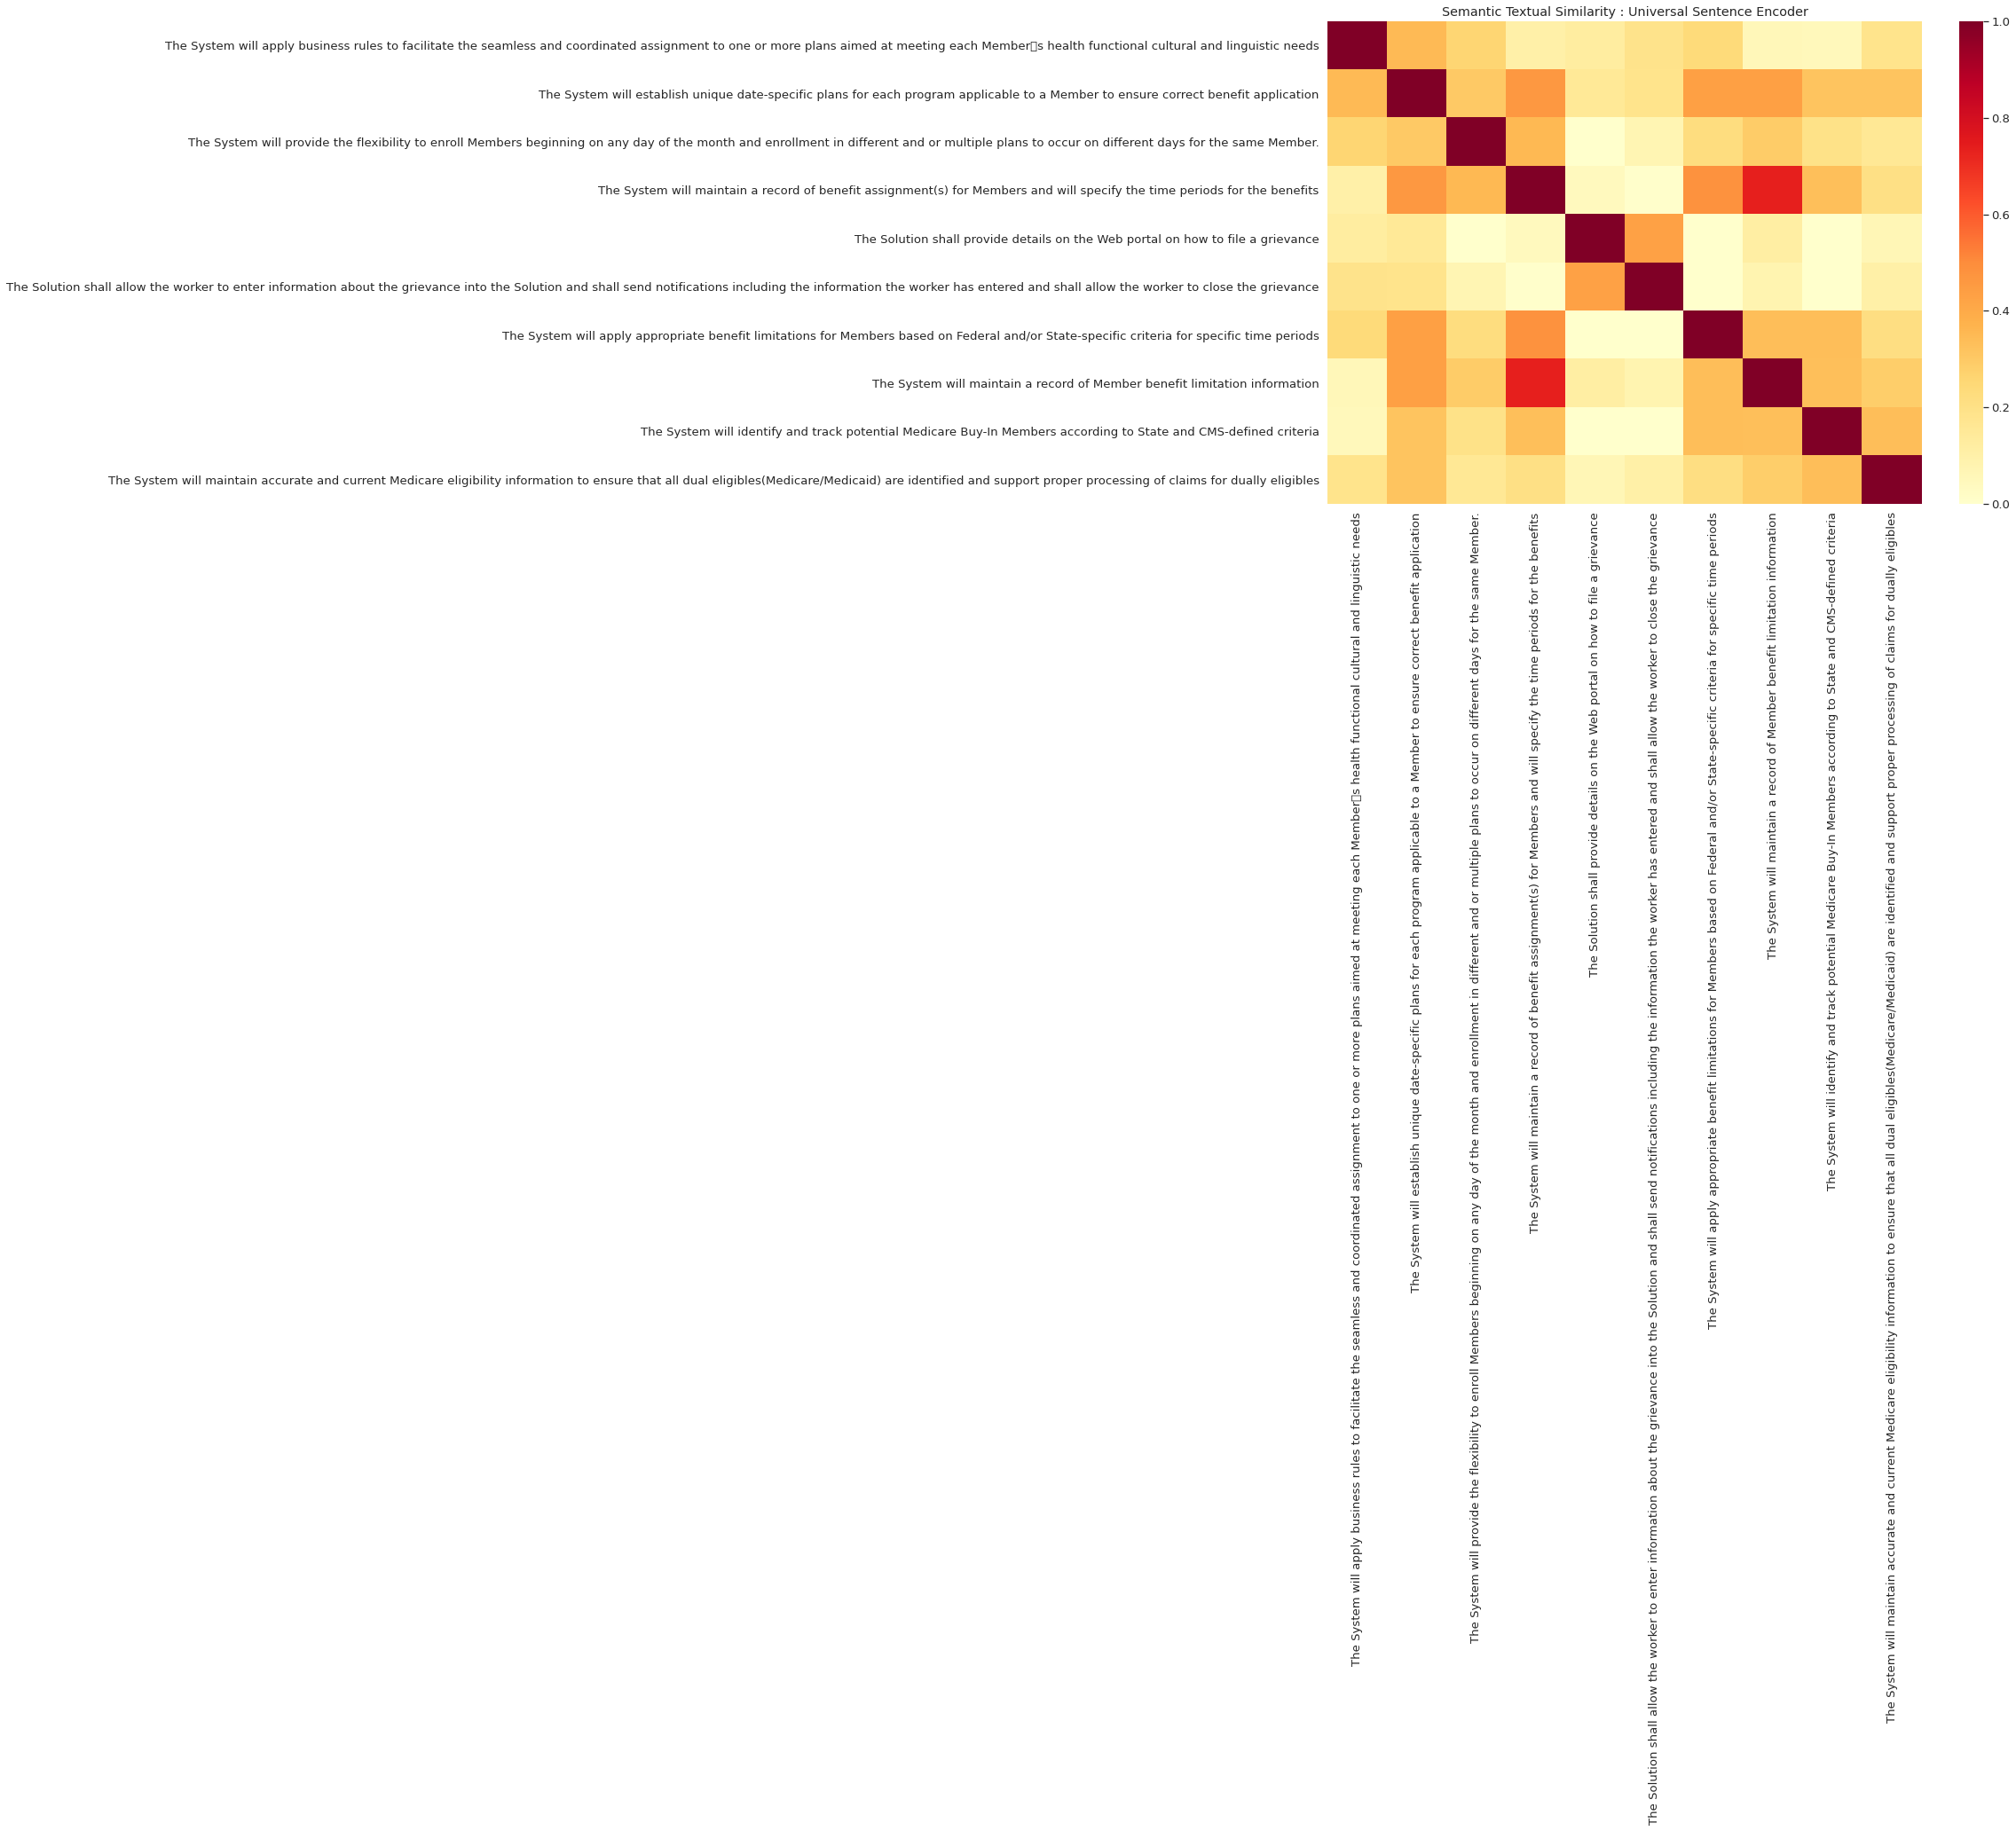

In [10]:
use = sm.USE_similarity(data_norm)
sm.plot_similarity(data,use,90, "Universal Sentence Encoder")